In [198]:
import numpy as np
import matplotlib.pyplot as plt

In [205]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

class NeuralNetwork:    
    def __init__(self, activationFunctions, learnigRates = 0.9, reg = 0.75):
        # In this network there are 4 visible units and 2 hidden units
        self.visibleAndHiddenUnits = np.array([4, 2])
        # numOfLayers = 2 (group of visible units and group of hidden units)
        self.numOfLayers = len(self.visibleAndHiddenUnits)
        self.learnigRates = np.array([learnigRates] * self.numOfLayers)
        self.regressionCoefficient = np.array([reg] * self.numOfLayers)
        
        if type(activationFunctions) is not list:
            self.activationFunctions = [activationFunctions] * (self.numOfLayers)
        else:
            self.activationFunctions = activationFunctions
            
        if len(self.activationFunctions) != self.numOfLayers:
            raise ValueError('An activation function not defined for every layer.')
               
        self.weightMatrix = []
        # Initialize weight matrix with random weights in the [-0.5, 0.5] interval
        self.weightMatrix.append(np.random.random((self.visibleAndHiddenUnits[0], self.visibleAndHiddenUnits[1])) - 0.5)
        self.weightMatrix.append(np.random.random((self.visibleAndHiddenUnits[-1], self.visibleAndHiddenUnits[0])) - 0.5)
        
    def recirculate(self, inputs):
        state = []
        for n in self.visibleAndHiddenUnits:
            state.append(np.ones((inputs.shape[0], 2, n)))
        
        state[0][:, 0, :] = inputs
        # First pass around the loop
        state[1][:, 0, :] = self.activationFunctions[0](state[0][:, 0, :] @ self.weightMatrix[0])
            
        
        state[0][:, 1, :] = self.regressionCoefficient[0] * state[0][:, 0, :] + \
                          (1 - self.regressionCoefficient[0]) * self.activationFunctions[1](state[1][:, 0, :] @ self.weightMatrix[1])
        # Second pass around the loop
        state[1][:, 1, :] = self.regressionCoefficient[1] * state[1][:, 0, :] + \
                              (1 - self.regressionCoefficient[1]) * self.activationFunctions[0](state[0][:, 1, :] @ self.weightMatrix[0])
            
        # Perform weight updates
        # From hidden units to visible units
        self.weightMatrix[0] += self.learnigRates[0] * state[0][:, 1, :].T @ (state[1][:, 0, :] - state[1][:, 1, :])
        # From visible units to hidden units
        self.weightMatrix[1] += self.learnigRates[1] * state[1][:, 0, :].T @ (state[0][:, 0, :] - state[0][:, 1, :])
        
        # return Squared reconstruction error
        return 0.5 * ((inputs - state[0][:, 1, :]) ** 2).sum()
    
    def getReconstructedOutput(self, inputs):
        State = []
        for n in self.visibleAndHiddenUnits:
            State.append(np.ones((inputs.shape[0], n)))
        
        State[0][:, :] = inputs
        # First pass around the loop
        State[1][:, :] = self.activationFunctions[0](State[0][:, :] @ self.weightMatrix[0])
        # Second pass around the loop and return the reconstructed output
        return self.activationFunctions[-1](State[1][:, :] @ self.weightMatrix[1])

def trainingNeuralNetwork(neuralNetwork, inputs, epochs):
    error = np.empty(epochs)
    for i in range(epochs):
        error[i] = neuralNetwork.recirculate(inputs)
    return error

In [206]:
neuralNetwork = NeuralNetwork(activationFunctions = [tanh, relu])

In [207]:
inputs = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
inputs

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [208]:
error = trainingNeuralNetwork(neuralNetwork, inputs, epochs = 1000)

In [209]:
error

array([1.14321184e-01, 1.10405633e-01, 1.06773332e-01, 1.03434897e-01,
       1.00394860e-01, 9.50614775e-02, 9.03952273e-02, 8.64281045e-02,
       8.30826648e-02, 7.95395361e-02, 7.62251955e-02, 7.33847003e-02,
       7.10221254e-02, 6.90309884e-02, 6.73257625e-02, 6.58445470e-02,
       6.45420157e-02, 6.33854987e-02, 6.23484505e-02, 6.14104081e-02,
       6.05552559e-02, 5.97699778e-02, 5.90437900e-02, 5.83675559e-02,
       5.77333986e-02, 5.71344457e-02, 5.65646612e-02, 5.60187310e-02,
       5.54919811e-02, 5.49803149e-02, 5.44801610e-02, 5.39884281e-02,
       5.35024627e-02, 5.30200108e-02, 5.25391814e-02, 5.20584125e-02,
       5.15764403e-02, 5.10922704e-02, 5.06051521e-02, 5.01145559e-02,
       4.96201523e-02, 4.91217943e-02, 4.86193781e-02, 4.81120689e-02,
       4.75999321e-02, 4.70832729e-02, 4.65624977e-02, 4.60381001e-02,
       4.55106494e-02, 4.49807801e-02, 4.44491820e-02, 4.39165915e-02,
       4.33837823e-02, 4.28515563e-02, 4.23207351e-02, 4.17921507e-02,
      

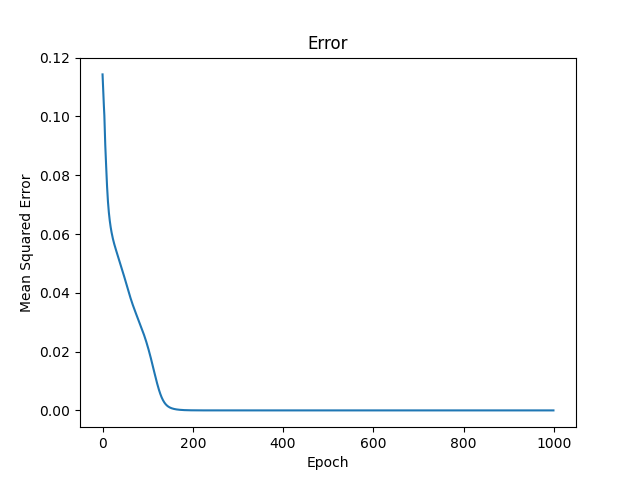

In [210]:
fig = plt.figure()
ax = fig.subplots(1,1)
ax.plot(error)
ax.set_title('Error')
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Epoch')
plt.show()

In [211]:
reconstructedOutput = neuralNetwork.getReconstructedOutput(inputs)

In [212]:
reconstructedOutput

array([[1.00000000e+00, 2.88657986e-15, 0.00000000e+00, 0.00000000e+00],
       [1.68753900e-14, 1.00000000e+00, 1.53765889e-14, 0.00000000e+00],
       [0.00000000e+00, 3.66373598e-15, 1.00000000e+00, 0.00000000e+00],
       [1.30173650e-14, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])